In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

Text(0.5, 0, 'Time passed in hours')

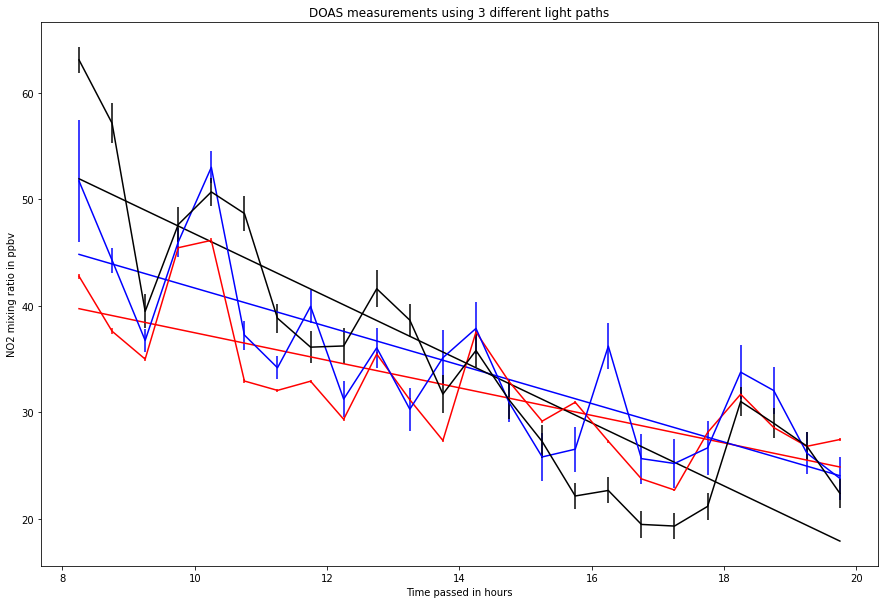

In [4]:
#plotting no2 doas data and its linear regressions

#open the NO2 Doas file and read in the data

data = np.array([[float(i) for i in (' '.join(line.split())).split(' ')] for line
in open('NO2_DOAS_data.txt').readlines()[1:]])

#save the measurements and the uncertainties in variables

t = (data[:,0]-735090)*24
measure1 = data[:,1]
uncert1 = data[:,2]
measure2 = data[:,3]
uncert2 = data[:,4]
measure3 = data[:,5]
uncert3 = data[:,6]

#calculate the covariances and the linear regressions

covariance1=np.cov(t,measure1)
x=np.zeros(2)
x[1]=covariance1[1,0]/covariance1[0,0]
x[0]=np.mean(measure1)-x[1]*np.mean(t)
lin_reg1 = x[0]+ x[1]*t

covariance2=np.cov(t,measure2)
x=np.zeros(2)
x[1]=covariance2[1,0]/covariance2[0,0]
x[0]=np.mean(measure2)-x[1]*np.mean(t)
lin_reg2 = x[0]+ x[1]*t

covariance3=np.cov(t,measure3)
x=np.zeros(2)
x[1]=covariance3[1,0]/covariance3[0,0]
x[0]=np.mean(measure3)-x[1]*np.mean(t)
lin_reg3 = x[0]+ x[1]*t

#plot the measurements, their errors and the linear regressions in one figure with a color code

fig = plt.figure(figsize = (15,10))
plt.plot(t,lin_reg1, color = 'r')
plt.plot(t,lin_reg2, color = 'b')
plt.plot(t,lin_reg3, color = 'k')
plt.errorbar(t, measure1, yerr=uncert1, color = 'r')
plt.errorbar(t,measure2, yerr=uncert2, color = 'b')
plt.errorbar(t,measure3, yerr=uncert3, color = 'k')
plt.title('DOAS measurements using 3 different light paths')
plt.ylabel('NO2 mixing ratio in ppbv')
plt.xlabel('Time passed in hours')